In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import datetime
import json
import logging
from typing import Dict, List, Optional

# Configure logging for privacy and monitoring
logging.basicConfig(level=logging.INFO, filename='mental_health_system.log',
                    format='%(asctime)s - %(levelname)s - %(message)s')

class DataPrivacy:
    """Handle data anonymization and encryption simulation"""
    @staticmethod
    def anonymize_data(data: pd.DataFrame) -> pd.DataFrame:
        """Simulate data anonymization and encryption"""
        anonymized = data.copy()
        if 'Timestamp' in anonymized.columns:
            anonymized['Timestamp'] = anonymized['Timestamp'].apply(lambda x: hash(str(x)))
        if 'comments' in anonymized.columns:
            anonymized['comments'] = anonymized['comments'].apply(lambda x: hash(str(x)) if pd.notnull(x) else x)
        logging.info("Data anonymized and sensitive fields encrypted")
        return anonymized

class StressAssessment:
    """Assess stress levels based on input features"""
    def __init__(self):
        self.model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
        self.scaler = StandardScaler()
        self.mood_encoder = LabelEncoder()
        self.family_history_encoder = LabelEncoder()
        self.is_trained = False
        self.feature_names = None

    def preprocess_data(self, data: pd.DataFrame) -> tuple:
        """Preprocess dataset for model training"""
        data = data.copy()

        # Simulate or derive features
        data['sleep_hours'] = np.random.uniform(4, 10, len(data))  # Placeholder
        data['work_hours'] = data['no_employees'].map({
            '1-5': 6.0, '6-25': 7.0, '26-100': 8.0,
            '100-500': 8.5, '500-1000': 9.0, 'More than 1000': 10.0
        }).fillna(8.0)
        data['physical_activity'] = np.random.uniform(0, 3, len(data))  # Placeholder
        data['social_interaction'] = data['coworkers'].map({
            'Yes': 5.0, 'Some of them': 3.0, 'No': 1.0
        }).fillna(3.0)
        data['self_reported_mood'] = data['mental_health_consequence'].map({
            'No': 'positive', 'Maybe': 'neutral', 'Yes': 'negative'
        }).fillna('neutral')
        data['treatment'] = data['treatment'].map({'Yes': 1, 'No': 0}).fillna(0)
        data['family_history'] = data['family_history'].map({'Yes': 1, 'No': 0}).fillna(0)
        data['stress_level'] = data['work_interfere'].map({
            'Never': 'low_stress',
            'Rarely': 'low_stress',
            'Sometimes': 'moderate_stress',
            'Often': 'high_stress',
            'NA': 'low_stress'
        }).fillna('low_stress')

        features = ['sleep_hours', 'work_hours', 'social_interaction',
                   'physical_activity', 'self_reported_mood', 'treatment', 'family_history']
        self.feature_names = features
        X = data[features].copy()

        # Encode categorical variables
        X['self_reported_mood'] = self.mood_encoder.fit_transform(X['self_reported_mood'])
        X['family_history'] = self.family_history_encoder.fit_transform(X['family_history'])

        # Handle missing values
        X = X.fillna(X.mean(numeric_only=True))

        y = data['stress_level']
        return X, y

    def train(self, data: pd.DataFrame):
        """Train stress prediction model"""
        X, y = self.preprocess_data(data)
        X_scaled = self.scaler.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        self.model.fit(X_train, y_train)
        self.is_trained = True

        # Log model performance and feature importance
        predictions = self.model.predict(X_test)
        logging.info(f"Model Performance:\n{classification_report(y_test, predictions)}")
        feature_importance = dict(zip(self.feature_names, self.model.feature_importances_))
        logging.info(f"Feature Importance: {feature_importance}")

    def predict_stress(self, user_input: Dict) -> str:
        """Predict stress level for a single user input"""
        if not self.is_trained:
            raise ValueError("Model not trained")

        input_df = pd.DataFrame([user_input])
        input_df['self_reported_mood'] = self.mood_encoder.transform(input_df['self_reported_mood'])
        input_df['family_history'] = self.family_history_encoder.transform(input_df['family_history'])
        input_scaled = self.scaler.transform(input_df[self.feature_names])

        prediction = self.model.predict(input_scaled)[0]
        logging.info(f"Predicted stress level: {prediction} for input: {user_input}")
        return prediction

class PatternRecognition:
    """Identify mood and behavior patterns"""
    @staticmethod
    def analyze_mood_trends(user_data: List[Dict]) -> Dict:
        """Analyze mood trends over time"""
        df = pd.DataFrame(user_data)
        if df.empty:
            return {"trend": "insufficient_data"}

        mood_counts = df['self_reported_mood'].value_counts()
        trend = {
            "dominant_mood": mood_counts.idxmax(),
            "mood_variability": float(mood_counts.std()) if len(mood_counts) > 1 else 0.0,
            "recent_mood": df['self_reported_mood'].iloc[-1]
        }
        logging.info(f"Mood trend analysis: {trend}")
        return trend

class InterventionMatching:
    """Match interventions to user needs"""
    interventions = {
        "high_stress": {
            "US": [
                "Deep breathing exercises (5 min)",
                "Schedule professional consultation",
                "Take a 10-min walk",
                "Contact EAP (Employee Assistance Program)"
            ],
            "India": [
                "Deep breathing exercises (5 min)",
                "Consult a mental health professional",
                "Take a 10-min walk",
                "Practice yoga or pranayama"
            ],
            "default": [
                "Deep breathing exercises (5 min)",
                "Schedule professional consultation",
                "Take a 10-min walk"
            ]
        },
        "moderate_stress": {
            "US": [
                "Mindfulness meditation (3 min)",
                "Connect with a friend",
                "Journal thoughts",
                "Join a workplace wellness program"
            ],
            "India": [
                "Mindfulness meditation (3 min)",
                "Connect with family or friends",
                "Journal thoughts",
                "Try guided meditation apps"
            ],
            "default": [
                "Mindfulness meditation (3 min)",
                "Connect with a friend",
                "Journal thoughts"
            ]
        },
        "low_stress": {
            "US": [
                "Maintain routine",
                "Engage in hobby",
                "Plan relaxation time"
            ],
            "India": [
                "Maintain routine",
                "Engage in hobby",
                "Plan relaxation time",
                "Attend community wellness events"
            ],
            "default": [
                "Maintain routine",
                "Engage in hobby",
                "Plan relaxation time"
            ]
        }
    }

    @staticmethod
    def recommend_interventions(stress_level: str, mood_trend: Dict, region: str = "default") -> List[str]:
        """Recommend interventions based on stress, mood, and region"""
        recommendations = InterventionMatching.interventions.get(stress_level, {}).get(region, [])
        if mood_trend.get("mood_variability", 0) > 1:
            recommendations.append("Consider a mood tracking journal")
        logging.info(f"Recommended interventions for {stress_level} in {region}: {recommendations}")
        return recommendations

class ProgressMonitoring:
    """Track user progress and flag risks"""
    @staticmethod
    def monitor_progress(history: List[Dict]) -> Dict:
        """Monitor stress and mood over time"""
        df = pd.DataFrame(history)
        if len(df) < 2:
            return {"status": "insufficient_data"}

        # Weight recent stress levels more heavily
        stress_counts = df['stress_level'].value_counts()
        latest_stress = df['stress_level'].iloc[-1]
        stress_trend = latest_stress if latest_stress in ['high_stress', 'moderate_stress'] else stress_counts.idxmax()

        mood_changes = df['self_reported_mood'].nunique()

        # Calculate risk score
        high_stress_count = len(df[df['stress_level'] == 'high_stress'])
        negative_mood_count = len(df[df['self_reported_mood'] == 'negative'])
        risk_score = (high_stress_count * 0.6 + negative_mood_count * 0.4) / len(df)

        result = {
            "stress_trend": stress_trend,
            "mood_stability": "stable" if mood_changes <= 2 else "variable",
            "risk_score": round(risk_score, 2),
            "risk_flag": risk_score > 0.4 or high_stress_count > 3
        }

        if result["risk_flag"]:
            result["recommendation"] = "Seek professional help immediately"
            logging.warning(f"High risk detected: risk_score={risk_score}, high_stress_count={high_stress_count}")

        logging.info(f"Progress monitoring: {result}")
        return result

class MentalHealthSystem:
    """Main system integrating all components"""
    def __init__(self):
        self.stress_assessor = StressAssessment()
        self.pattern_recognizer = PatternRecognition()
        self.intervention_matcher = InterventionMatching()
        self.progress_monitor = ProgressMonitoring()
        self.user_history = []

    def load_dataset(self, file_path: str):
        """Load and preprocess dataset"""
        try:
            data = pd.read_csv(file_path)
            data = DataPrivacy.anonymize_data(data)
            self.stress_assessor.train(data)
            logging.info("Dataset loaded and model trained")
        except Exception as e:
            logging.error(f"Error loading dataset: {str(e)}")
            raise

    def validate_input(self, user_input: Dict) -> None:
        """Validate user input ranges"""
        required_keys = ['sleep_hours', 'work_hours', 'social_interaction',
                        'physical_activity', 'self_reported_mood', 'treatment',
                        'family_history']
        optional_keys = ['region']
        missing_required = set(required_keys) - set(user_input.keys())
        if missing_required:
            raise ValueError(f"Missing required input fields: {missing_required}")

        if not (0 <= user_input['sleep_hours'] <= 24):
            raise ValueError("Sleep hours must be between 0 and 24")
        if not (0 <= user_input['work_hours'] <= 24):
            raise ValueError("Work hours must be between 0 and 24")
        if not (0 <= user_input['social_interaction'] <= 5):
            raise ValueError("Social interaction must be between 0 and 5")
        if not (0 <= user_input['physical_activity'] <= 24):
            raise ValueError("Physical activity must be between 0 and 24")
        if user_input['self_reported_mood'] not in ['positive', 'neutral', 'negative']:
            raise ValueError("Mood must be 'positive', 'neutral', or 'negative'")
        if user_input['treatment'] not in [0, 1]:
            raise ValueError("Treatment must be 0 or 1")
        if user_input['family_history'] not in [0, 1]:
            raise ValueError("Family history must be 0 or 1")
        if 'region' in user_input and user_input['region'] not in ['US', 'India', 'default']:
            raise ValueError("Region must be 'US', 'India', or 'default'")

        logging.info(f"Validated input: {user_input}")

    def process_daily_input(self, user_input: Dict) -> Dict:
        """Process daily user input and generate recommendations"""
        self.validate_input(user_input)

        # Remove region from input for stress prediction
        prediction_input = {k: v for k, v in user_input.items()
                          if k in ['sleep_hours', 'work_hours', 'social_interaction',
                                   'physical_activity', 'self_reported_mood', 'treatment',
                                   'family_history']}

        # Predict stress level
        stress_level = self.stress_assessor.predict_stress(prediction_input)

        # Update user history
        user_input_copy = user_input.copy()
        user_input_copy['stress_level'] = stress_level
        user_input_copy['timestamp'] = datetime.datetime.now().isoformat()
        self.user_history.append(user_input_copy)

        # Analyze patterns
        mood_trend = self.pattern_recognizer.analyze_mood_trends(self.user_history)

        # Get interventions
        region = user_input.get('region', 'default')
        interventions = self.intervention_matcher.recommend_interventions(stress_level, mood_trend, region)

        # Monitor progress
        progress = self.progress_monitor.monitor_progress(self.user_history)

        return {
            "stress_level": stress_level,
            "mood_trend": mood_trend,
            "interventions": interventions,
            "progress": progress
        }

def main():
    """Example usage with multiple inputs"""
    system = MentalHealthSystem()

    # Load the Kaggle dataset
    dataset_path = 'survey.csv'  # Ensure this file is in your working directory
    system.load_dataset(dataset_path)

    # Example user inputs to simulate history
    user_inputs = [
        {
            'sleep_hours': 7.0,
            'work_hours': 8.5,
            'social_interaction': 3.0,  # Equivalent to 'Some of them'
            'physical_activity': 1.0,
            'self_reported_mood': 'neutral',  # Equivalent to 'Maybe'
            'treatment': 0,  # No treatment
            'family_history': 0,  # No family history
            'region': 'India'
        },
        {
            'sleep_hours': 6.0,
            'work_hours': 10.0,
            'social_interaction': 1.0,  # Equivalent to 'No'
            'physical_activity': 0.5,
            'self_reported_mood': 'negative',  # Equivalent to 'Yes'
            'treatment': 1,  # Received treatment
            'family_history': 1,  # Has family history
            'region': 'India'
        }
    ]

    results = []
    for user_input in user_inputs:
        result = system.process_daily_input(user_input)
        results.append(result)

    # Print the last result
    print(json.dumps(results[-1], indent=2))

if __name__ == "__main__":
    main()

{
  "stress_level": "moderate_stress",
  "mood_trend": {
    "dominant_mood": "neutral",
    "mood_variability": 0.0,
    "recent_mood": "negative"
  },
  "interventions": [
    "Mindfulness meditation (3 min)",
    "Connect with family or friends",
    "Journal thoughts",
    "Try guided meditation apps"
  ],
  "progress": {
    "stress_trend": "moderate_stress",
    "mood_stability": "stable",
    "risk_score": 0.2,
    "risk_flag": false
  }
}


In [12]:
import matplotlib.pyplot as plt

def plot_user_trends(user_history):
    """Plot stress and mood over time"""
    df = pd.DataFrame(user_history)

    if df.empty:
        print("No data to plot.")
        return

    # Convert timestamp
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Map values to numeric
    stress_map = {'low_stress': 1, 'moderate_stress': 2, 'high_stress': 3}
    mood_map = {'negative': 1, 'neutral': 2, 'positive': 3}
    df['stress_numeric'] = df['stress_level'].map(stress_map)
    df['mood_numeric'] = df['self_reported_mood'].map(mood_map)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(df['timestamp'], df['stress_numeric'], label='Stress Level', marker='o', color='red')
    plt.plot(df['timestamp'], df['mood_numeric'], label='Mood Level', marker='s', color='blue')
    plt.title("User Stress and Mood Over Time")
    plt.xlabel("Timestamp")
    plt.ylabel("Level (1=Low/Negative, 3=High/Positive)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [14]:
def main():
    """Example usage with multiple inputs"""
    system = MentalHealthSystem()

    # Load the Kaggle dataset
    dataset_path = 'survey.csv'  # Make sure this file is uploaded to Colab
    system.load_dataset(dataset_path)

    # Example user inputs
    user_inputs = [
        {
            'sleep_hours': 7.0,
            'work_hours': 8.5,
            'social_interaction': 3.0,
            'physical_activity': 1.0,
            'self_reported_mood': 'neutral',
            'treatment': 0,
            'family_history': 0,
            'region': 'India'
        },
        {
            'sleep_hours': 6.0,
            'work_hours': 10.0,
            'social_interaction': 1.0,
            'physical_activity': 0.5,
            'self_reported_mood': 'negative',
            'treatment': 1,
            'family_history': 1,
            'region': 'India'
        }
    ]

    results = []
    for user_input in user_inputs:
        result = system.process_daily_input(user_input)
        results.append(result)

    # Print last result
    print(json.dumps(results[-1], indent=2))

    return system


{
  "stress_level": "moderate_stress",
  "mood_trend": {
    "dominant_mood": "neutral",
    "mood_variability": 0.0,
    "recent_mood": "negative"
  },
  "interventions": [
    "Mindfulness meditation (3 min)",
    "Connect with family or friends",
    "Journal thoughts",
    "Try guided meditation apps"
  ],
  "progress": {
    "stress_trend": "moderate_stress",
    "mood_stability": "stable",
    "risk_score": 0.2,
    "risk_flag": false
  }
}


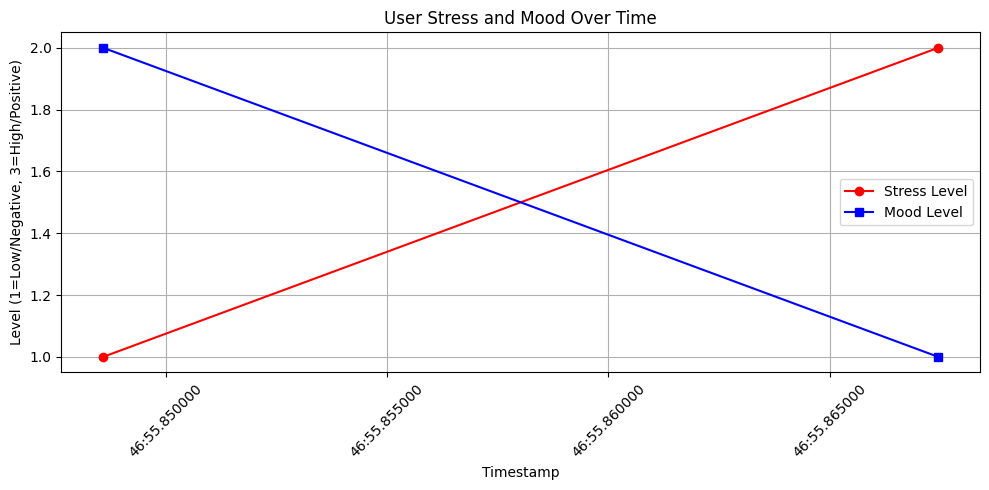

In [15]:
# Run main and get the system object
system = main()

plot_user_trends(system.user_history)
